# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as st
from functools import reduce
import numpy as np
from scipy import stats
import altair as alt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Mouse_Study_Result_Merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
Mouse_Study_Result_Merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

n = len(pd.unique(Mouse_Study_Result_Merge['Mouse ID']))

print (n)


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_dataframe = Mouse_Study_Result_Merge[Mouse_Study_Result_Merge.duplicated(['Mouse ID', 'Timepoint'])]
 

print(duplicate_mouse_dataframe["Mouse ID"].count() )

5


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows based on Mouse ID and Timepoint :")
duplicate_mouse_dataframe

Duplicate Rows based on Mouse ID and Timepoint :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_Study_Result_Merge_clean = Mouse_Study_Result_Merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [6]:
# Checking the number of mice in the clean DataFrame.
n = len(pd.unique(Mouse_Study_Result_Merge_clean['Mouse ID']))

print (n)

249


## Summary Statistics

In [7]:
# import reduce function 
from functools import reduce

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mouse_Study_Result_Merge_clea_mean = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index(name="mean")
Mouse_Study_Result_Merge_clea_median = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index(name="median")
Mouse_Study_Result_Merge_clea_var = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index(name="var")
Mouse_Study_Result_Merge_clea_std = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index(name="std")
Mouse_Study_Result_Merge_clea_sem = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().reset_index(name="sem")
data_frames = [Mouse_Study_Result_Merge_clea_mean, Mouse_Study_Result_Merge_clea_median, Mouse_Study_Result_Merge_clea_var ,Mouse_Study_Result_Merge_clea_std , Mouse_Study_Result_Merge_clea_sem]
Mouse_Study_Statistics = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)

#display(Mouse_Study_Statistics)
Mouse_Study_Statistics.style.hide_index()
#Mouse_Study_Statistics.to_string(index=False)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18144\848462455.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Mouse_Study_Statistics.style.hide_index()


Drug Regimen,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
print ( "                                Tumor Volume (mm3) ")
Mouse_Study_Statistics.style.hide_index()

                                Tumor Volume (mm3) 


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18144\1250219387.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Mouse_Study_Statistics.style.hide_index()


Drug Regimen,mean,median,var,std,sem
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

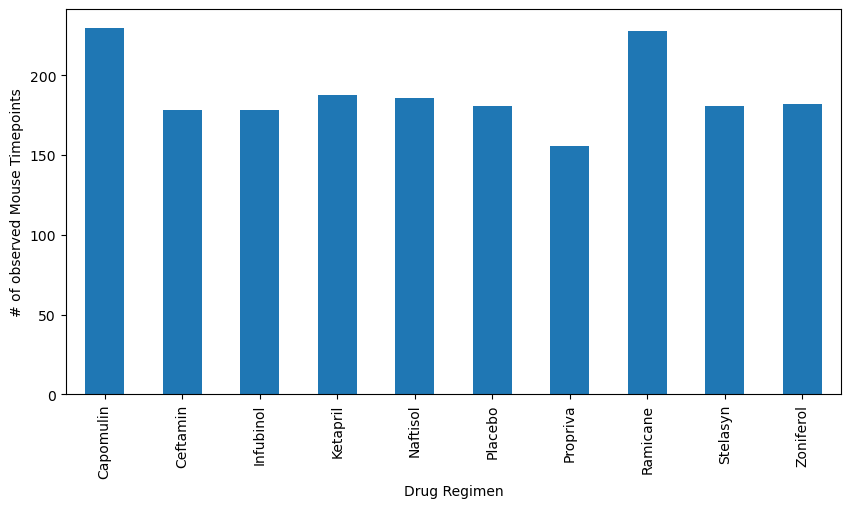

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count_dataframe = Mouse_Study_Result_Merge_clean.groupby("Drug Regimen")["Mouse ID"].count().reset_index(name="Count")
mouse_count_dataframe
bar_plot_panda= mouse_count_dataframe.plot.bar(x='Drug Regimen', y='Count', rot=90,figsize=(10, 5),legend=False)
bar_plot_panda.set_ylabel("# of observed Mouse Timepoints")

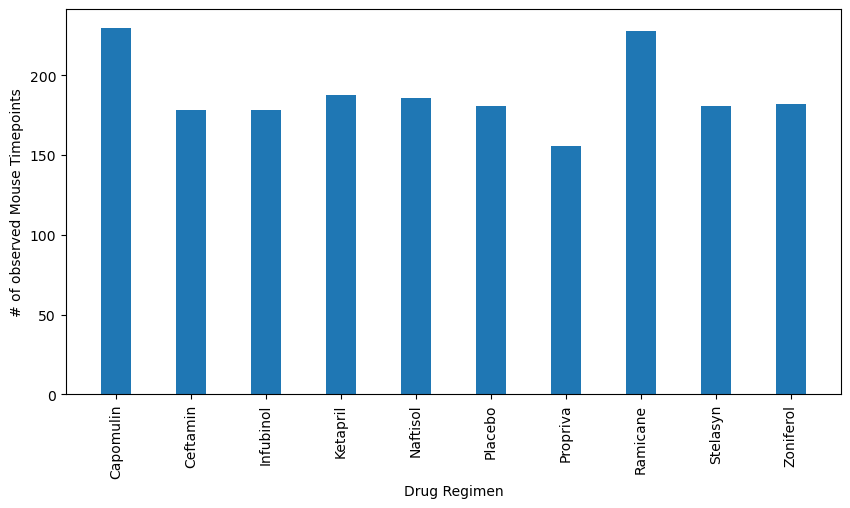

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_name = list(mouse_count_dataframe["Drug Regimen"])
counts = list(mouse_count_dataframe["Count"])

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(drug_name, counts, 
        width = 0.4)
 
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.show()

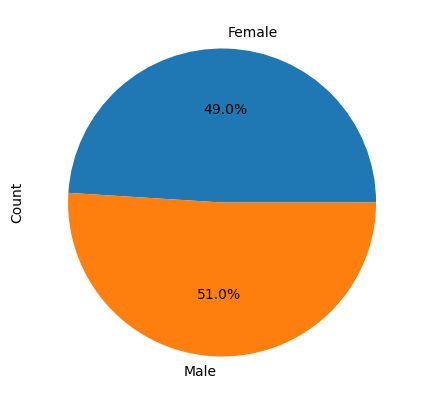

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_count_dataframe_sex = Mouse_Study_Result_Merge_clean.groupby("Sex")["Mouse ID"].count().reset_index(name="Count")
Total_count = len(Mouse_Study_Result_Merge_clean. index)

mouse_count_dataframe_sex["Count"] = ((mouse_count_dataframe_sex["Count"] / Total_count ) * 100).round(0) 
mouse_count_dataframe_sex
sex_labels=['Female','Male']
plot = mouse_count_dataframe_sex.plot.pie(y='Count', figsize=(5, 5),labels=sex_labels,legend=False,autopct='%1.1f%%')


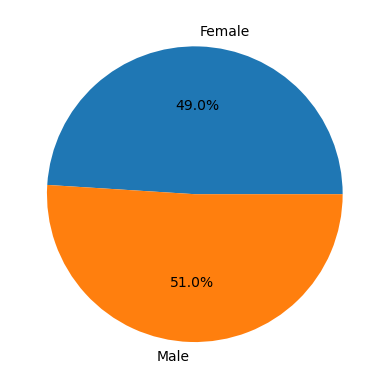

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import numpy as np
y = np.array(mouse_count_dataframe_sex["Count"])
sex_labels=['Female','Male']
plt.pie(y,labels=sex_labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Mouse ID','Timepoint', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df_drug_regimen = dataframe[(dataframe['Drug Regimen'] == 'Capomulin') |(dataframe['Drug Regimen'] == 'Ramicane') | (dataframe['Drug Regimen'] == 'Infubinol') | (dataframe['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

rslt_df_drug_regimen_groupby = rslt_df_drug_regimen.groupby('Mouse ID')

max_rslt_df_drug_regimen_groupby = rslt_df_drug_regimen_groupby.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(rslt_df_drug_regimen, max_rslt_df_drug_regimen_groupby, on='Mouse ID')

merged_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Drug Regimen_x,Timepoint_y,Tumor Volume (mm3)_y,Drug Regimen_y
0,k403,0,45.000000,Ramicane,45,45.0,Ramicane
1,k403,5,38.825898,Ramicane,45,45.0,Ramicane
2,k403,10,35.014271,Ramicane,45,45.0,Ramicane
3,k403,15,34.223992,Ramicane,45,45.0,Ramicane
4,k403,20,32.997729,Ramicane,45,45.0,Ramicane


In [14]:
# Get the Max time point and corresponding values 

max_timepoint_df = merged_df.loc[merged_df['Timepoint_x'] == merged_df['Timepoint_y']]
max_timepoint_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Drug Regimen_x,Timepoint_y,Tumor Volume (mm3)_y,Drug Regimen_y
9,k403,45,22.050126,Ramicane,45,45.000000,Ramicane
19,s185,45,23.343598,Capomulin,45,45.000000,Capomulin
29,x401,45,28.484033,Capomulin,45,45.473753,Capomulin
39,m601,45,28.430964,Capomulin,45,45.000000,Capomulin
49,g791,45,29.128472,Ramicane,45,45.851531,Ramicane
...,...,...,...,...,...,...,...
773,x822,45,61.386660,Ceftamin,45,61.386660,Ceftamin
783,y163,45,67.685569,Infubinol,45,67.685569,Infubinol
793,y769,45,68.594745,Ceftamin,45,68.594745,Ceftamin
803,y865,45,64.729837,Ceftamin,45,64.729837,Ceftamin


In [15]:
#Create List for IQR Calculation for each drug regimen

dataframe_Capomulin = max_timepoint_df[(max_timepoint_df['Drug Regimen_x'] == 'Capomulin')]
dataframe_Ramicane = max_timepoint_df[(max_timepoint_df['Drug Regimen_x'] == 'Ramicane')]
dataframe_Infubinol = max_timepoint_df[(max_timepoint_df['Drug Regimen_x'] == 'Infubinol')]
dataframe_Ceftamin = max_timepoint_df[(max_timepoint_df['Drug Regimen_x'] == 'Ceftamin')]

list_Capomulin = dataframe_Capomulin["Tumor Volume (mm3)_x"].values.tolist()
list_Ramicane = dataframe_Ramicane["Tumor Volume (mm3)_x"].values.tolist()
list_Infubinol = dataframe_Infubinol["Tumor Volume (mm3)_x"].values.tolist()
list_Ceftamin = dataframe_Ceftamin["Tumor Volume (mm3)_x"].values.tolist()


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

#dataframe_drun_regimen
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#For Capomulin
q3_Capomulin, q1_Capomulin = np.percentile(list_Capomulin, [75, 25])
IQR_Capomulin = q3_Capomulin - q1_Capomulin
upper_bound_Capomulin = q3_Capomulin + 1.5 * IQR_Capomulin
lower_bound_Capomulin = q1_Capomulin - 1.5 * IQR_Capomulin
Capomulin_outlier=[]
for x in list_Capomulin : 
    if (int(x) < lower_bound_Capomulin or int(x) > upper_bound_Capomulin) :
        Capomulin_outlier.append(x)

#For Ramicane
q3_Ramicane, q1_Ramicane = np.percentile(list_Ramicane, [75, 25])
IQR_Ramicane = q3_Ramicane - q1_Ramicane
upper_bound_Ramicane = q3_Ramicane + 1.5 * IQR_Ramicane
lower_bound_Ramicane = q1_Ramicane - 1.5 * IQR_Ramicane

Ramicane_outlier=[]
for x in list_Ramicane : 
    if (int(x) < lower_bound_Ramicane or int(x) > upper_bound_Ramicane) :
        Ramicane_outlier.append(x)


#For Infubinol
q3_Infubinol, q1_Infubinol = np.percentile(list_Infubinol, [75, 25])
IQR_Infubinol = q3_Infubinol - q1_Infubinol
upper_bound_Infubinol = q3_Infubinol + 1.5 * IQR_Infubinol
lower_bound_Infubinol = q1_Infubinol - 1.5 * IQR_Infubinol
Infubinol_outlier=[]
for x in list_Infubinol : 
    if (int(x) < lower_bound_Infubinol or int(x) > upper_bound_Infubinol) :
        Infubinol_outlier.append(x)

    
#For Ceftamin
q3_Ceftamin, q1_Ceftamin = np.percentile(list_Ceftamin, [75, 25])
IQR_Ceftamin = q3_Ceftamin - q1_Ceftamin
upper_bound_Ceftamin = q3_Ceftamin + 1.5 * IQR_Ceftamin
lower_bound_Ceftamin = q1_Ceftamin - 1.5 * IQR_Ceftamin
Ceftamin_outlier=[]
for x in list_Ceftamin : 
    if (int(x) < lower_bound_Ceftamin or int(x) > upper_bound_Ceftamin) :
        Ceftamin_outlier.append(x)

    
# add subset 

    
# Determine outliers using upper and lower bounds
print(f"IQR_Capomulin {IQR_Capomulin}")
print(f"Number of Infubinol Outlier is : {len(Capomulin_outlier)}")
print(f"IQR_Ramicane {IQR_Ramicane}")
print(f"Number of Infubinol Outlier is : {len(Ramicane_outlier)}")
print(f"IQR_Infubinol {IQR_Infubinol}")
print(f"Number of Infubinol Outlier is : {len(Infubinol_outlier)}")
print(f"IQR_Ceftamin {IQR_Ceftamin}")
print(f"Number of Ceftamin Outlier is : {len(Ceftamin_outlier)}")

IQR_Capomulin 7.781863460000004
Number of Infubinol Outlier is : 0
IQR_Ramicane 9.098536719999998
Number of Infubinol Outlier is : 0
IQR_Infubinol 11.477135160000003
Number of Infubinol Outlier is : 1
IQR_Ceftamin 15.577752179999997
Number of Ceftamin Outlier is : 0


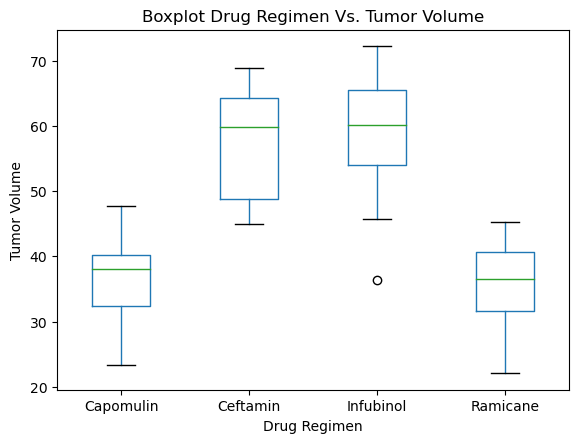

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# dataframe_all4 = dataframe[(dataframe['Drug Regimen'] == 'Capomulin') | 
#                                      (dataframe['Drug Regimen'] == 'Ramicane')  | 
#                                      (dataframe['Drug Regimen'] == 'Infubinol') |
#                                      (dataframe['Drug Regimen'] == 'Ceftamin')]  

ax1 = max_timepoint_df.boxplot(by ='Drug Regimen_x', column =['Tumor Volume (mm3)_x'], grid = False,ylabel="Tumor Volume",xlabel="Drug Regimen")
plt.title( 'Boxplot Drug Regimen Vs. Tumor Volume' )
plt.suptitle('') 
plt.show()


## Line and Scatter Plots

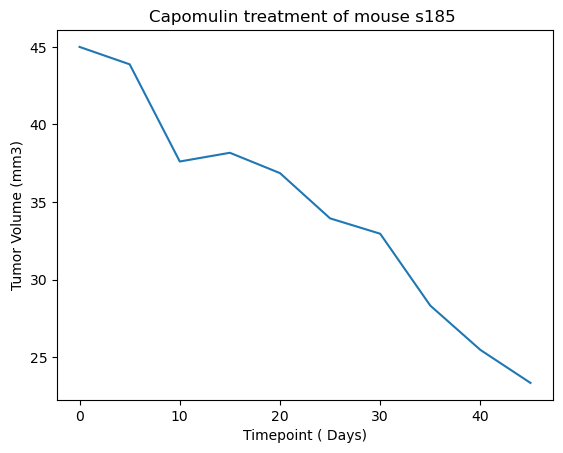

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Mouse ID','Timepoint', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df = dataframe[dataframe['Drug Regimen'] == 'Capomulin']
rslt_df_s185 = rslt_df[rslt_df['Mouse ID'] == 's185']
rslt_df_s185
plt.plot(rslt_df_s185["Timepoint"], rslt_df_s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint ( Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse s185 ')
plt.show()

In [19]:
dataframe = pd.DataFrame(Mouse_Study_Result_Merge_clean, columns = ['Mouse ID','Weight (g)', 'Tumor Volume (mm3)' , 'Drug Regimen'])
rslt_df_Capomulin = dataframe[dataframe['Drug Regimen'] == 'Capomulin']
rslt_df_Capomulin_grouped = rslt_df_Capomulin.groupby(["Mouse ID"])
rslt_df_Capomulin_avg = rslt_df_Capomulin_grouped.mean() 
rslt_df_Capomulin_avg 

organized_rslt_df_Capomulin_avg = rslt_df_Capomulin_avg[["Weight (g)","Tumor Volume (mm3)"]]
organized_rslt_df_Capomulin_avg


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18144\4191276283.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rslt_df_Capomulin_avg = rslt_df_Capomulin_grouped.mean()


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


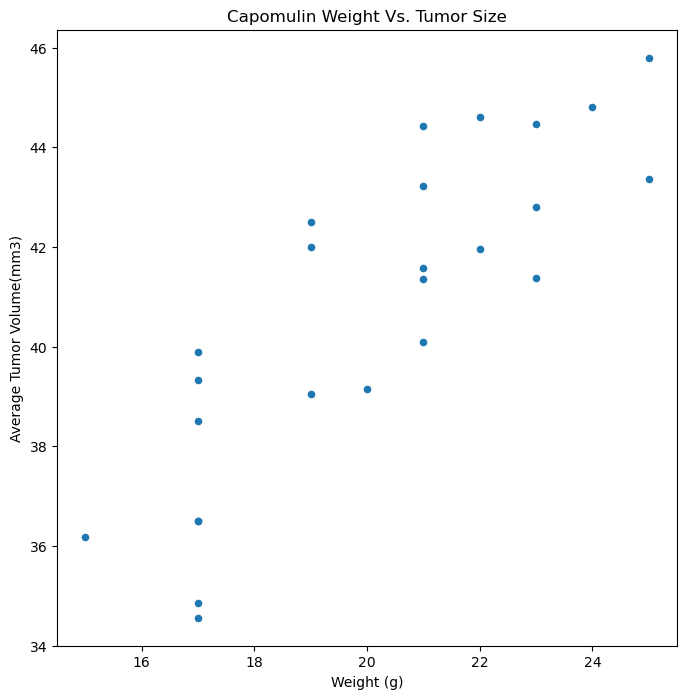

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen




rslt_df_Capomulin_avg .plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),
              title="Capomulin Weight Vs. Tumor Size",xlabel='Weight (g)', ylabel='Average Tumor Volume(mm3)')
plt.show()




## Correlation and Regression

The correlation coefficient between weight and Tumor Volume is 0.84


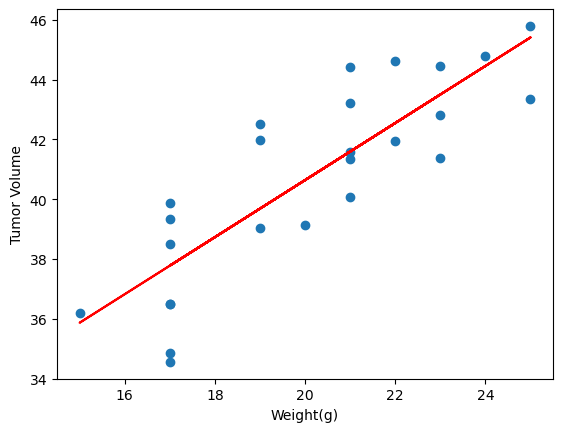

In [32]:

# Add the linear regression equation and line to plot
x_values = rslt_df_Capomulin_avg['Weight (g)']
y_values = rslt_df_Capomulin_avg['Tumor Volume (mm3)']
print(f"The correlation coefficient between weight and Tumor Volume is {round(stats.pearsonr(x_values,y_values)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume')
plt.show()
